In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="whitegrid")
import numpy as np
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 350

In [44]:
model_improv = pd.read_csv('/home/srivathsa/projects/studies/gad/mrm_stats/model_improv.csv')
model_improv.mean()

PSNR_2D      31.841513
PSNR_2.5D    32.382220
PSNR_MPR     33.564730
PSNR_VGG     34.282743
PSNR_ENH     35.127072
SSIM_2D       0.896189
SSIM_2.5D     0.896981
SSIM_MPR      0.901960
SSIM_VGG      0.920315
SSIM_ENH      0.924535
dtype: float64

In [71]:
dict_metrics = []

model_map = {
    '2D': 'UNet 2D',
    '2.5D': '2.5D',
    'MPR': 'MPR',
    'VGG': 'VGG + GAN',
    'ENH': 'Enh. mask'
}

for idx, row in model_improv.iterrows():
    for key in row.keys():
        if key == 'Case' or 'SSIM' in key:
            continue
        metric, model_kw = key.split('_')
        row_dict = {}
        row_dict['case'] = row['Case']
        row_dict['model'] = model_map[model_kw]
        row_dict['psnr'] = row[key]
        row_dict['ssim'] = row[key.replace('PSNR', 'SSIM')]
        dict_metrics.append(row_dict)

In [72]:
df_metrics = pd.DataFrame(dict_metrics)

In [73]:
df_metrics

,case,model,psnr,ssim
0,NO37,UNet 2D,22.079899,0.801569
1,NO37,2.5D,24.027190,0.816093
2,NO37,MPR,24.281111,0.824079
3,NO37,VGG + GAN,26.745667,0.881929
4,NO37,Enh. mask,27.306189,0.893555
...,...,...,...,...
125,Patient_0572,UNet 2D,32.327507,0.933950
126,Patient_0572,2.5D,32.341130,0.917218
127,Patient_0572,MPR,34.292811,0.916431
128,Patient_0572,VGG + GAN,34.979480,0.934298


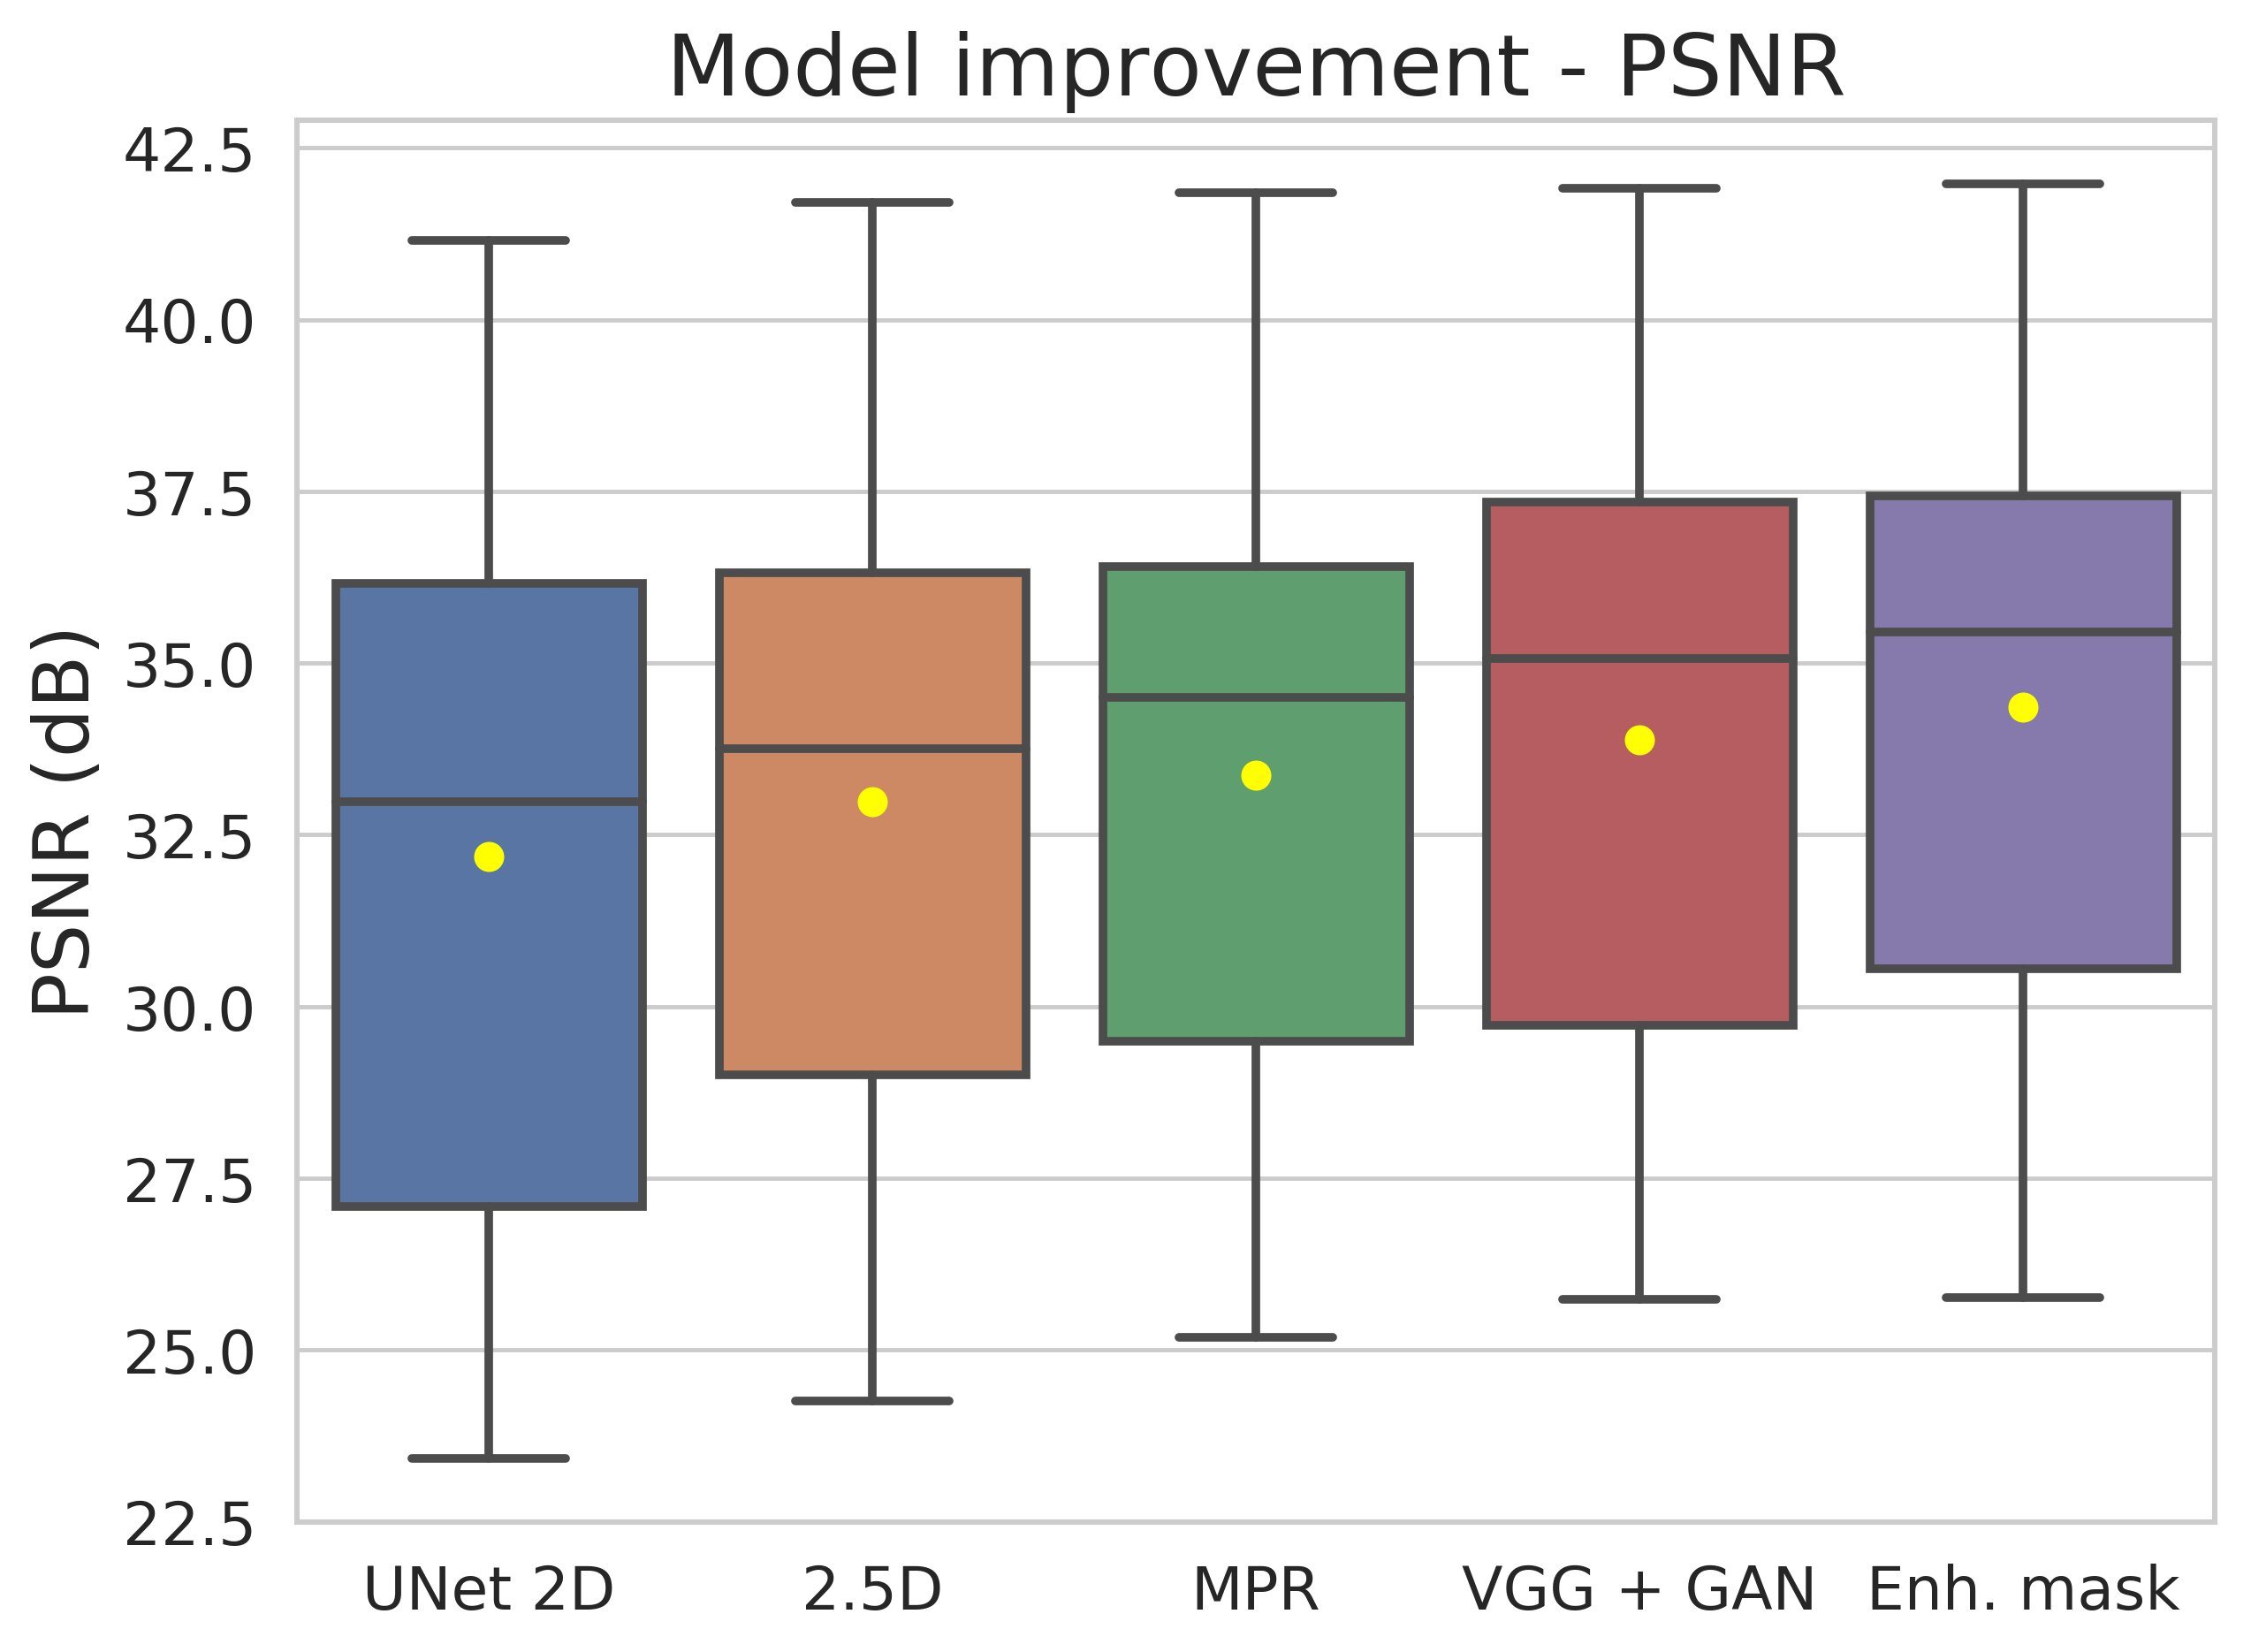

In [39]:
ax = sns.boxplot(
    x="model", y="psnr", data=df_metrics, linewidth=2, showmeans=True,
    meanprops={"marker":"o","markerfacecolor":"yellow", "markeredgecolor":"yellow"}
)
# ax.set(ylabel='PSNR (dB)', xlabel='', title='Model improvement - PSNR')

ax.set_xlabel('')
ax.set_ylabel('PSNR (dB)', fontsize=18)
ax.set_title('Model improvement - PSNR', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)

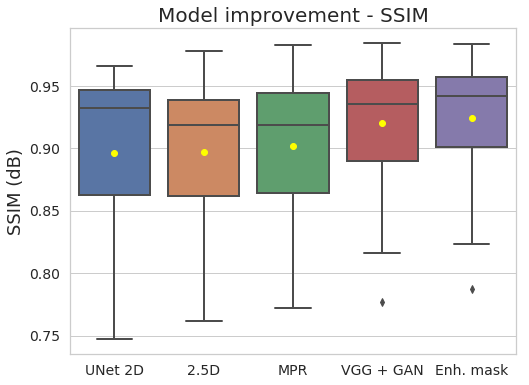

In [86]:
ax = sns.boxplot(
    x="model", y="ssim", data=df_metrics, linewidth=2, showmeans=True,
    meanprops={"marker":"o","markerfacecolor":"yellow", "markeredgecolor":"yellow"}
)
# ax.set(ylabel='PSNR (dB)', xlabel='', title='Model improvement - PSNR')

ax.set_xlabel('')
ax.set_ylabel('SSIM (dB)', fontsize=18)
ax.set_title('Model improvement - SSIM', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)

0.8531538461538464 0.886


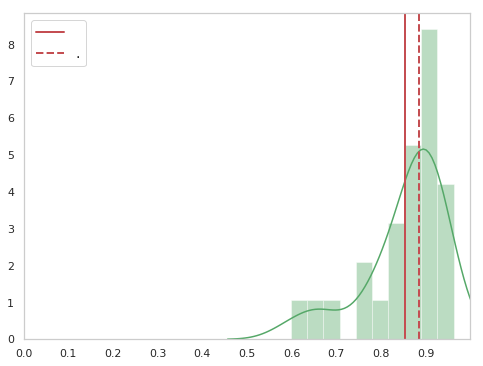

In [53]:
dice_scores = [0.902, 0.927, 0.925, 0.915, 0.948, 0.93, 0.963, 0.912, 0.919, 0.883, 0.851, 0.896, 0.86, 0.88,
              0.895, 0.889, 0.89, 0.866, 0.819, 0.827, 0.812, 0.66, 0.672, 0.598, 0.763, 0.78]

mean = np.mean(dice_scores)
median = np.median(dice_scores)
minval = np.min(dice_scores)
maxval = np.max(dice_scores)

print(mean, median)
ax = sns.distplot(dice_scores, color="g", bins=10)
ax.set(xlim=(0, 1))
ax.axvline(mean, color='r', linestyle='-', linewidth=2)
ax.axvline(median, color='r', linestyle='--', linewidth=2)

ax.set_xlabel('', fontsize=16)
ax.set_xticks(np.arange(0.0, 1.0, 0.1))
ax.grid(False)
# ax.set_title('Distribution of tumor segmentation Dice score', fontsize=18)

plt.legend({'': mean, '.': median}, fontsize=14)

### Ablation

In [8]:
df_abl = pd.read_csv('/home/srivathsa/projects/studies/gad/mrm_stats/all_metrics_mod.csv')

dict_metrics = []

model_map = {
    '2D': 'UNet 2D',
    '7ch': '2.5D',
    'MPR': 'MPR',
    'VGG': 'VGG + GAN',
    'ENH': 'Enh. mask'
}


for idx, row in df_abl.iterrows():
    for key in row.keys():
        if key == 'Case' or 'SSIM' in key or 'Unnamed' in key:
            continue
        model_kw, metric = key.split('_')
        row_dict = {}
        row_dict['case'] = row['Case']
        row_dict['model'] = model_map[model_kw]
        row_dict['psnr'] = row[key]
        row_dict['ssim'] = row[key.replace('PSNR', 'SSIM')]
        dict_metrics.append(row_dict)
df_metrics = pd.DataFrame(dict_metrics)

,case,model,psnr,ssim
0,101_Id_051,UNet 2D,32.934440,0.893342
1,101_Id_051,2.5D,33.024144,0.898990
2,101_Id_051,MPR,33.339830,0.899923
3,101_Id_051,VGG + GAN,33.608321,0.910585
4,101_Id_051,Enh. mask,34.826198,0.918076
...,...,...,...,...
245,Prisma9,UNet 2D,32.655619,0.878210
246,Prisma9,2.5D,33.085131,0.892223
247,Prisma9,MPR,33.735317,0.902188
248,Prisma9,VGG + GAN,33.805828,0.915451


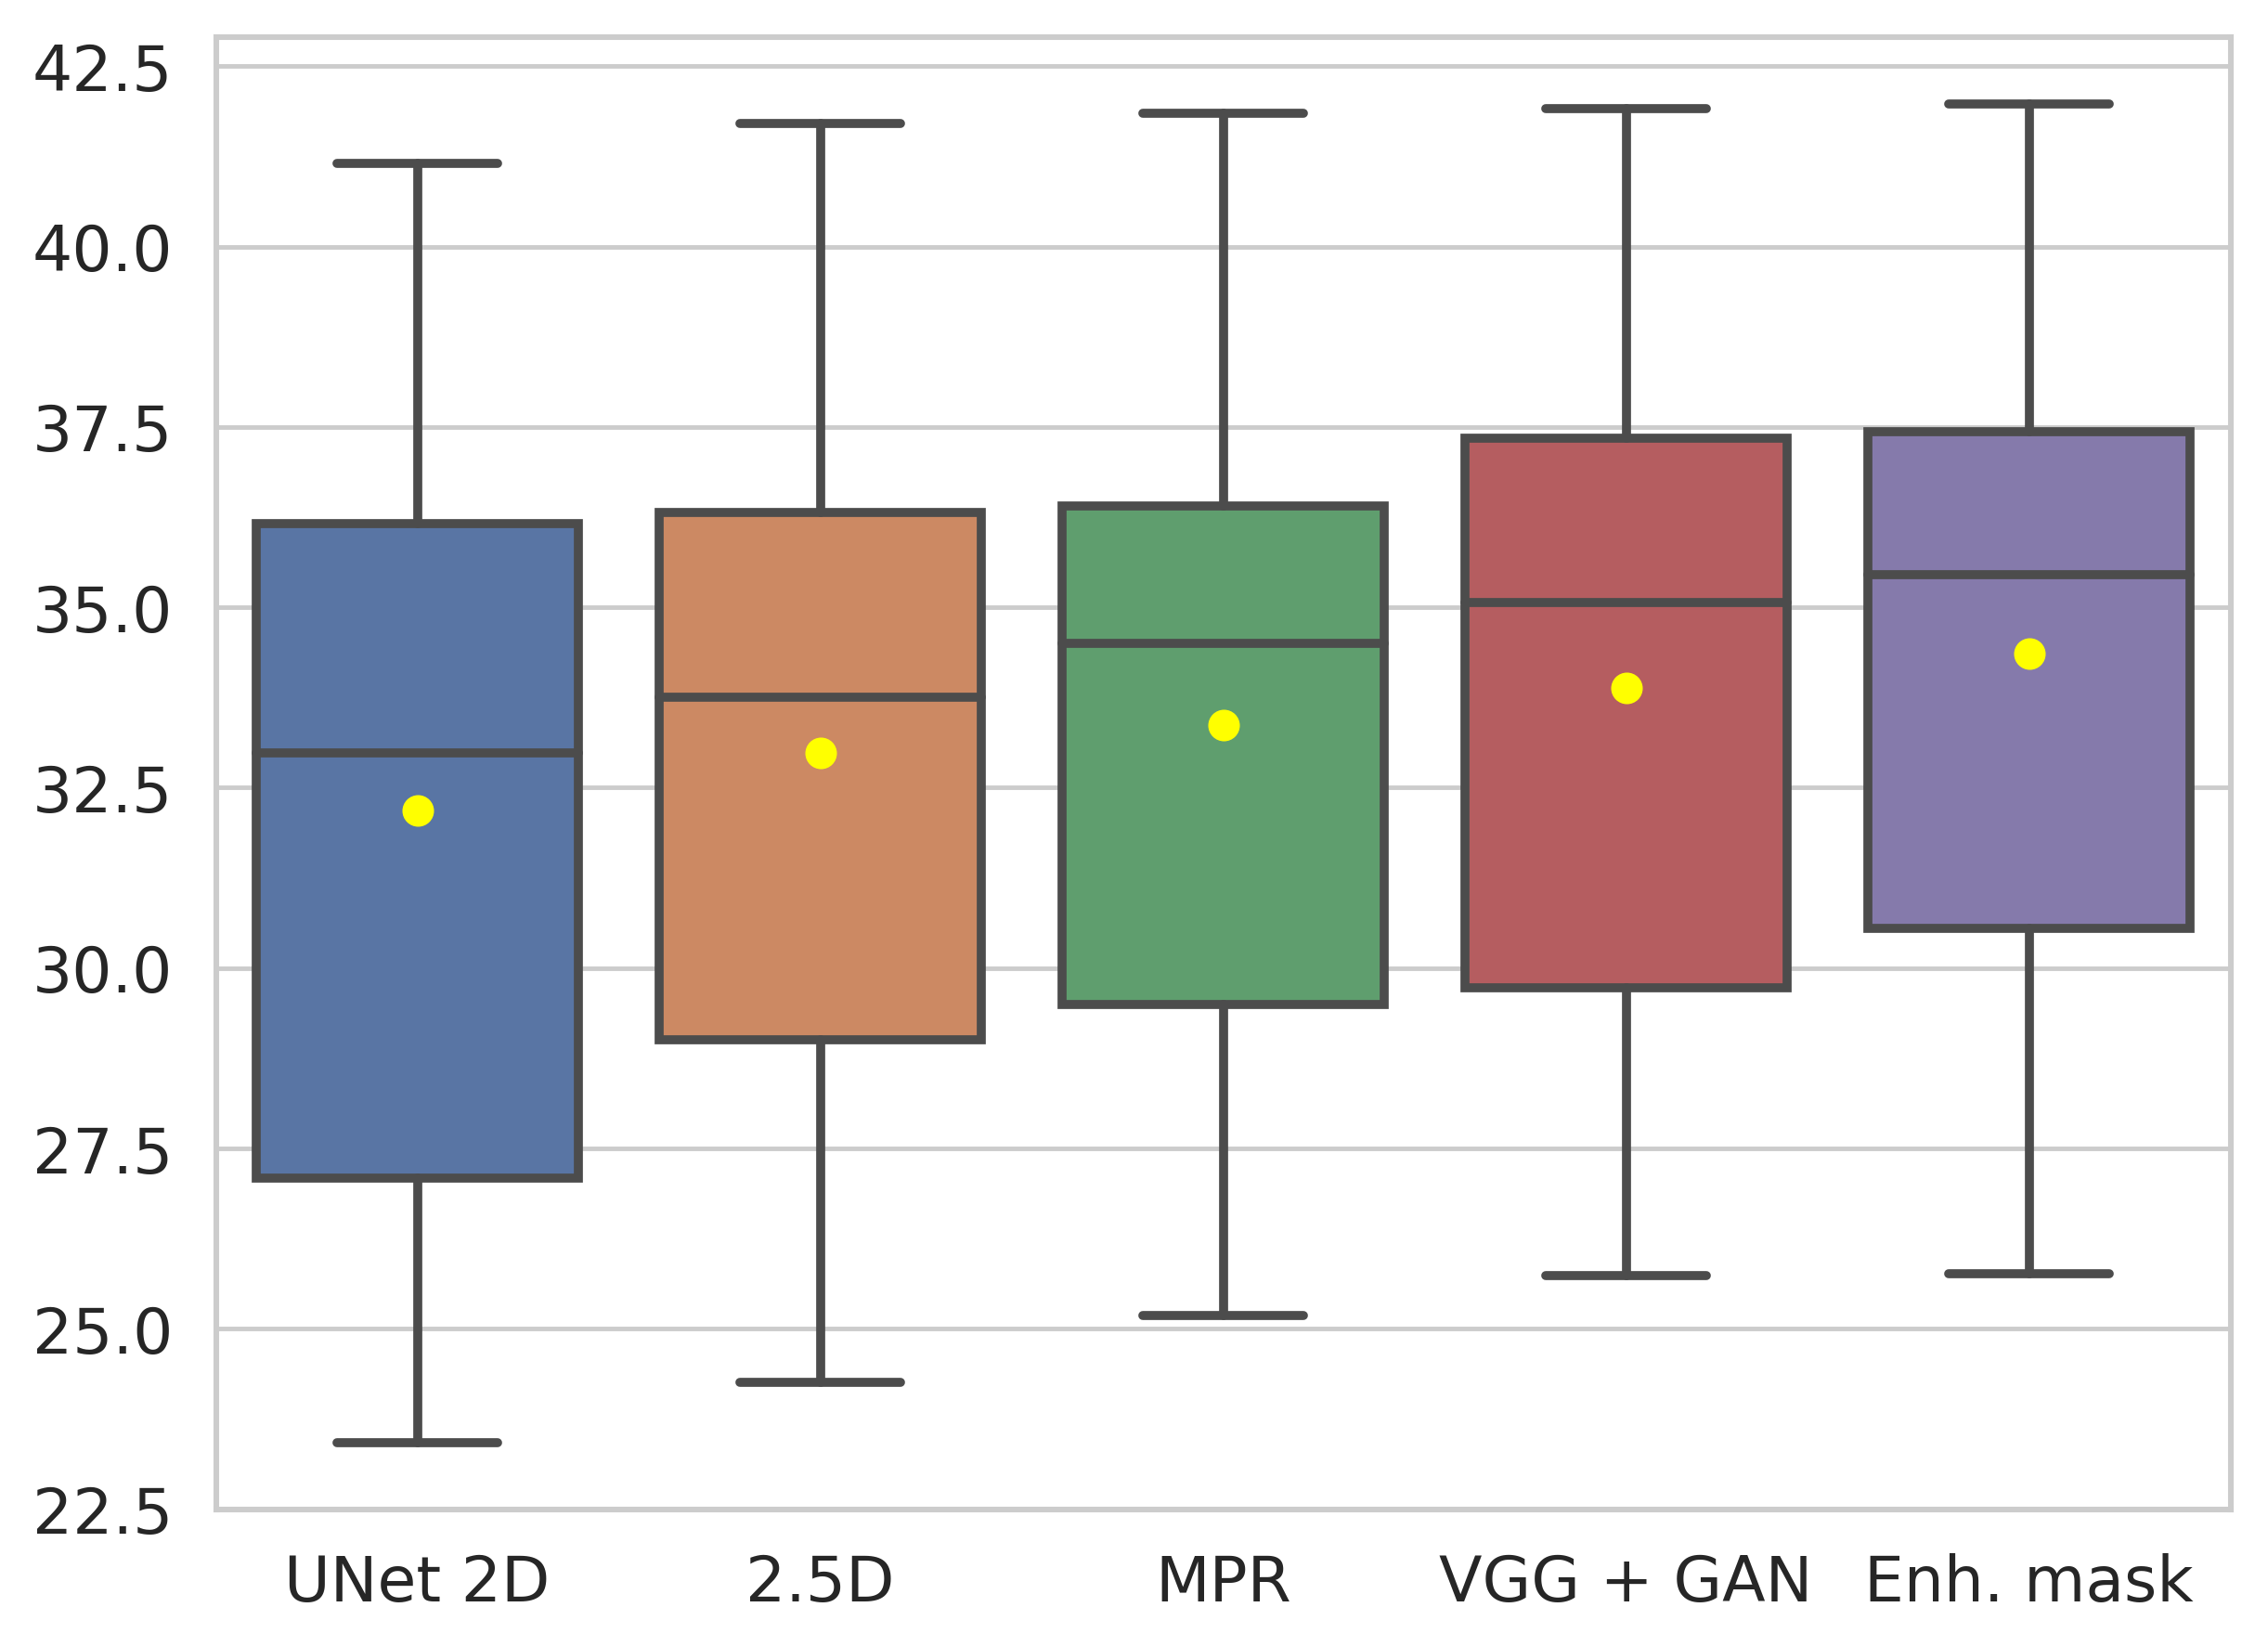

In [42]:
ax = sns.boxplot(
    x="model", y="psnr", data=df_metrics, linewidth=2, showmeans=True,
    meanprops={"marker":"o","markerfacecolor":"yellow", "markeredgecolor":"yellow"}
)

ax.set_xlabel('')
ax.set_ylabel('', fontsize=18)
# ax.set_title('Ablation Study - PSNR', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('abl_psnr.png')

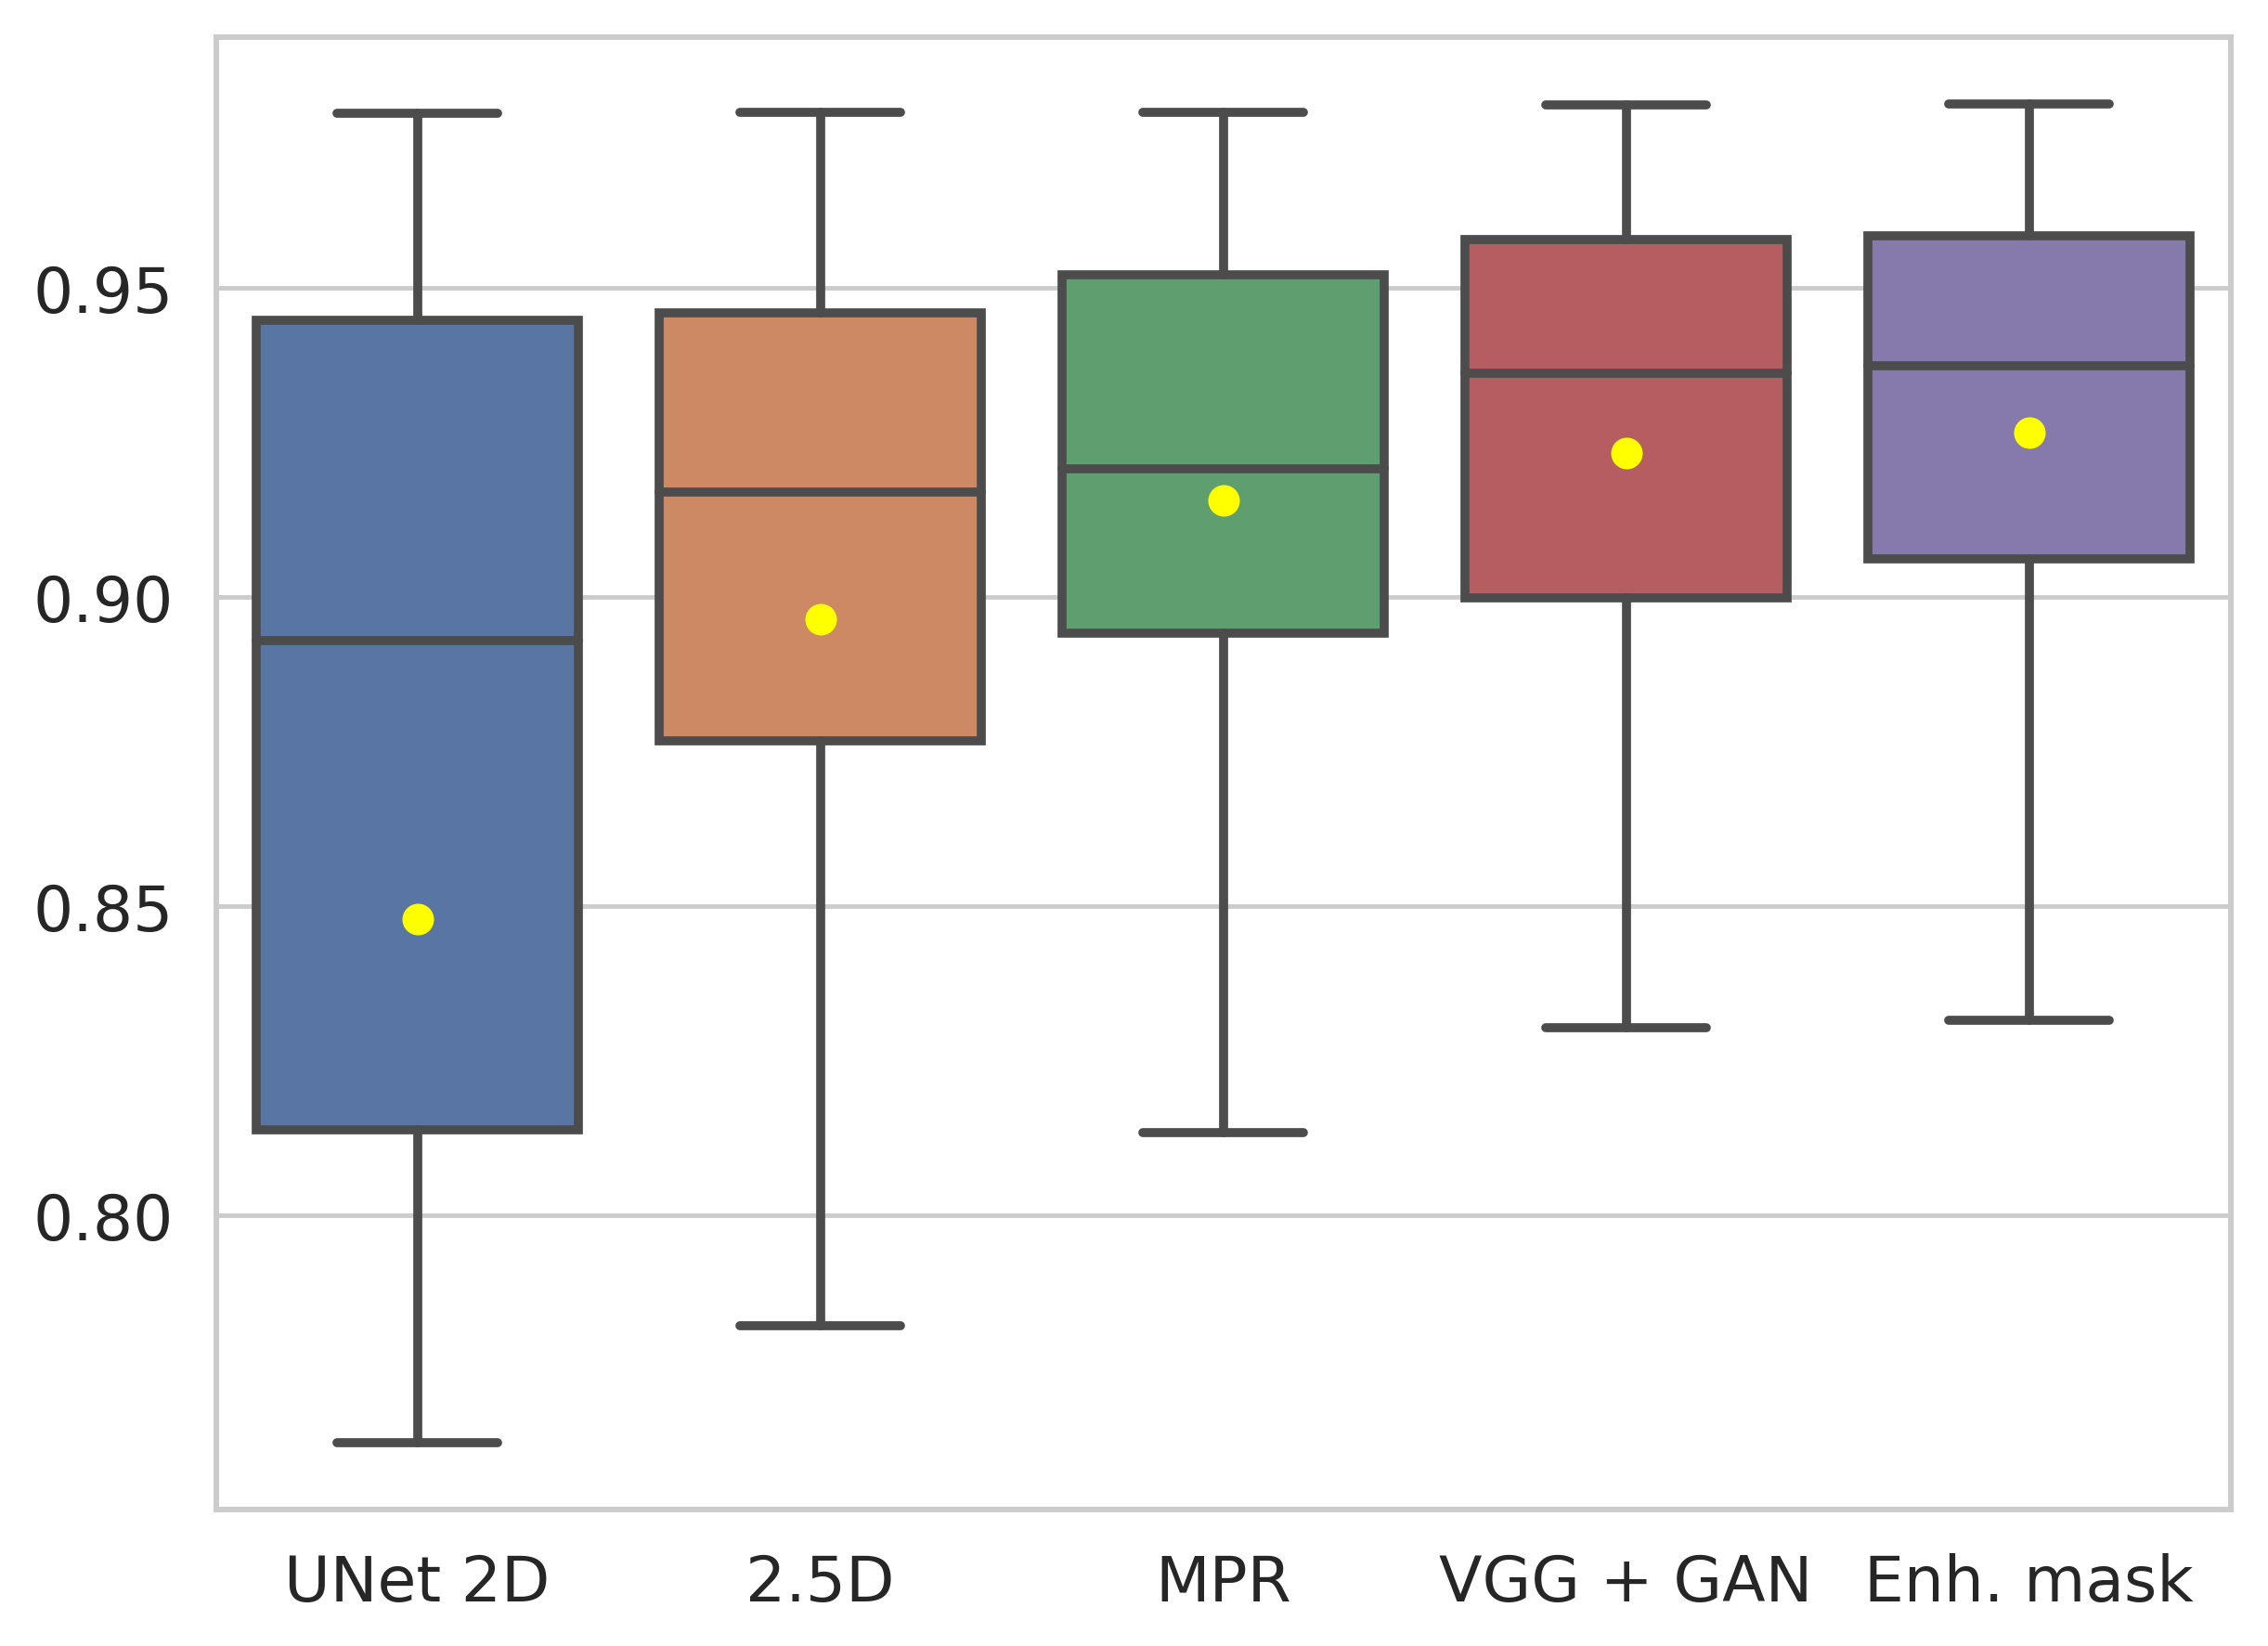

In [41]:
ax = sns.boxplot(
    x="model", y="ssim", data=df_metrics, linewidth=2, showmeans=True, showfliers=False,
    meanprops={"marker":"o","markerfacecolor":"yellow", "markeredgecolor":"yellow"}
)

ax.set_xlabel('')
ax.set_ylabel('', fontsize=18)
# ax.set_title('Ablation Study - SSIM', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)